In [3]:
import json
import os
import sys
import glob
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

Locate results

In [4]:
results_dir = 'results/race_results.json'
with open(results_dir, 'r') as input_file:
    results_dict = json.load(input_file)

In [5]:
results_dict['nanodet_320x320']['model_size']

3.6196184158325195

Plot counts

In [6]:
models = list(results_dict.keys())
sizes = [results_dict[model]['model_size'] for model in models]

In [7]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharey=True)
ax=axes.ravel()

ax[0].bar(models, sizes, color = 'tab:red', width = 0.4)
ax[0].set_title("Ball visibility")
ax[0].set_ylabel("No. of occurances")
#for i, v in enumerate(vis_vals):
#    ax[0].text(i - 0.175, v + 10, str(v), color='k', fontweight='bold')

'''
ax[1].bar(type_keys, type_vals, color ='tab:blue', width = 0.4)
ax[1].set_title("Game type")
for i, v in enumerate(type_vals):
    ax[1].text(i - 0.125, v + 10, str(v), color='k', fontweight='bold')

ax[2].bar(ball_keys, ball_vals, color = 'tab:green', width = 0.4)
ax[2].set_title("Ball Size")
for i, v in enumerate(ball_vals):
    ax[2].text(i - 0.175, v + 10, str(v), color='k', fontweight='bold')
'''

#fig.tight_layout()
plt.show()

: 

: 

Plot object characteristics

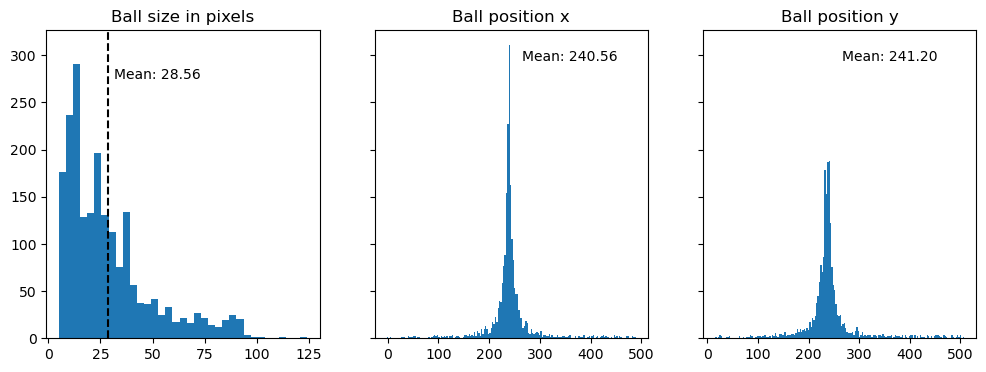

In [8]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharey=True)
ax=axes.ravel()

ball_rads = np.array(ball_rads)*2
ax[0].hist(ball_rads, bins=35)
ax[0].set_title("Ball size in pixels")
min_ylim, max_ylim = ax[0].axis()[-2:]
ax[0].axvline(ball_rads.mean(), color='k', linestyle='dashed', linewidth=1.5)
ax[0].text(ball_rads.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(ball_rads.mean()))

ball_x = np.array(ball_x)
ax[1].hist(ball_x, bins=180)
ax[1].set_title("Ball position x")
min_ylim, max_ylim = ax[1].axis()[-2:]
ax[1].text(ball_x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(ball_x.mean()))

ball_y = np.array(ball_y)
ax[2].hist(ball_y, bins=180)
ax[2].set_title("Ball position y")
min_ylim, max_ylim = ax[2].axis()[-2:]
ax[2].text(ball_y.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(ball_y.mean()))

plt.show()